In [1]:
%%html
<style>
table {float:left}
</style>

## Q1
#### Method List

name | param | description
---- | --- | ---
def brightnessFunc(value) | value: int type. The coordinate value | create value of brightness by coordinate |
def drawPicture(img, pitch, whiteBandWidth, blackBandWidth, direction, cosBright) | img: ndarry type. Image <br> pitch: int type. Pitch <br> whiteBandWidth: int type. the width of whiteBand <br> direction: string type. 'H' for create the Horizontal grating; 'V' for Vertical <br> cosBright: bool type. flag to generate cosine waves of brightness  | according the params to draw grating|
def combineXYImg | ximg: ndarry type. Image<br> yimg: ndarry type. Image | comparing the intensity of two grating on the same pixel, the larger value of intensity will used to create new image
def process | / | start to process image and print the result |


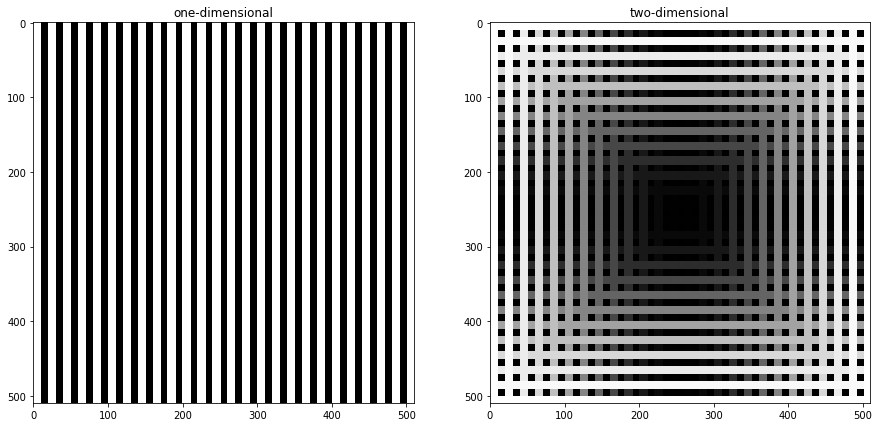

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

def brightnessFunc(value):
    # the min of brightness is 0, max is 255
    brightness = (math.cos(value/canvasW*3.14*2) + 1)/2*255;
    return brightness
        
def drawPicture(img, pitch, whiteBandWidth, direction, cosBright):
    shift = int(whiteBandWidth/2);
    
    # begain to draw the whiteBand
    nextDrawPoint = 0 + shift;
    while (nextDrawPoint<canvasH):
        if(cosBright == True):
            #  draw the grating with cosine waves of brightness
            brightness = (brightnessFunc(nextDrawPoint))
        else:
            brightness = 255 # draw the clear-cut black and white grating
        
        if(direction == 'H'): # draw the herizon grating
            cv2.line(img,pt1=(nextDrawPoint,0),pt2=(nextDrawPoint,canvasW),color=(brightness, brightness, brightness),thickness=whiteBandWidth)
        elif(direction == 'V'): # draw the vertical grating
            cv2.line(img,pt1=(0, nextDrawPoint),pt2=(canvasH, nextDrawPoint),color=(brightness, brightness, brightness),thickness=whiteBandWidth)
        nextDrawPoint += pitch

# 光强度的叠加：不考虑光的物理属性，比较pixel上x光栅和y光栅强度，取较大值
# comparing the intensity of two grating on the same pixel, the pixel's brightness will equal the lager one
def combineXYImg(ximg, yimg):
    img = np.maximum(xAixImg, yAixImg)
    return img

def process():
    # Q1-1
    drawPicture(oneDG, pitch,whiteBandWidth,'H',False)
    
    # Q1-2
    drawPicture(xAixImg, pitch,whiteBandWidth,'H',True)
    drawPicture(yAixImg, pitch,whiteBandWidth,'V',True)
    
    twoDG = combineXYImg(xAixImg,yAixImg);

    # print the result
    fig = plt.figure(figsize=(15,15))
    ax1 = fig.add_subplot(1,2,1)
    ax1.set_title("one-dimensional",fontsize=12)
    ax1.imshow(oneDG)

    ax2 = fig.add_subplot(1,2,2)
    ax2.set_title("two-dimensional",fontsize=12)
    ax2.imshow(twoDG)

    
# set the canvas size
canvasH = 510
canvasW = 510
# the property of pitch and width is not physical 1mm. 
pitch = 20
whiteBandWidth = 10

# oneDG is one-dimensional grating
oneDG = np.zeros(shape=(canvasH,canvasW,3),dtype=np.int16)

# twoDG is two-dimensional grating
twoDG = np.zeros(shape=(canvasH,canvasW,3),dtype=np.int16)
# xAixImg is cosine waves of brightness horizontally
xAixImg = np.zeros(shape=(canvasH,canvasW,3),dtype=np.int16)
# yAixImg is cosine waves of brightness vetically
yAixImg = np.zeros(shape=(canvasH,canvasW,3),dtype=np.int16)
# start to work
process()


## Q2-1
#### Method List

name | param | description
---- | --- | ---
def smallWindow4Pixel(img,i,j) | img:Image <br> i:The value of Y-aix <br> j:The value of Y-aix | calculate the average brightness of the surrounding four pixels |
def process | / | start to process image and print the result|

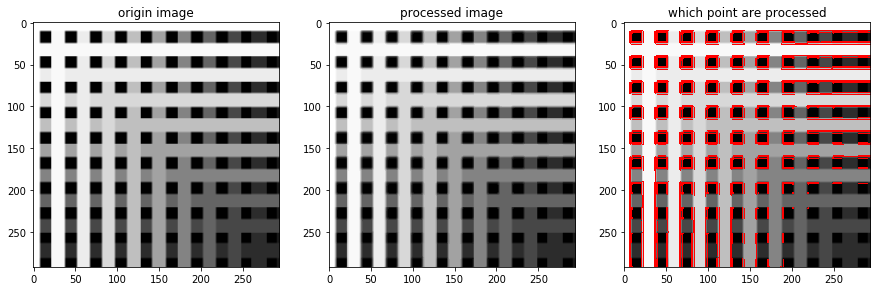

In [3]:

# calculate the average brightness of the surrounding four pixels
def smallWindow4Pixel(img,i,j):
    # store the total brightness
    sumBrightness = 0;
    # store how many points been counted
    sumNumber = 0;
    if(0<=i-1<len(img)):
        sumBrightness += img[i-1][j]
        sumNumber += 1;
    if(0<=j-1<len(img[i])):
        sumBrightness += img[i][j-1]
        sumNumber += 1;
    if(0<=j+1<len(img[i])):       
        sumBrightness += img[i][j+1]
        sumNumber += 1;
    if(0<=i+1<len(img)):
        sumBrightness += img[i+1][j]
        sumNumber += 1;
    return int(sumBrightness/sumNumber)

def processImage():
    # loop through the points of image
    for i in range(0, int(len(testImg))):
        for j in range(0,(len(testImg[i]))):
            average = smallWindow4Pixel(testImg,i,j)
            if(abs(testImg[i][j]-average) >10):
                testImg[i][j] = average
                # store the point which assigned the new value to the list
                processedPoint.append([i,j]);
                
    # convert to bgr image for display which pixel are modified
    src_RGB = cv2.cvtColor(testImg, cv2.COLOR_GRAY2BGR)
    for n in processedPoint:
        # set the color of pixel which is modified to red
        src_RGB[n[0]][n[1]] = [255,0,0]

    fig = plt.figure(figsize=(15,15))
    ax1 = fig.add_subplot(1,3,1)
    ax1.set_title('origin image',fontsize=12)
    ax1.imshow(origin, cmap='gray')
    
    ax2 = fig.add_subplot(1,3,2)
    ax2.set_title('processed image',fontsize=12)
    ax2.imshow(testImg, cmap='gray')
    
    ax3 = fig.add_subplot(1,3,3)
    ax3.set_title('which point are processed',fontsize=12)
    ax3.imshow(src_RGB)
    
# load the test picture
origin = cv2.imread("testPicture.png",cv2.IMREAD_GRAYSCALE)
testImg = cv2.imread("testPicture.png",cv2.IMREAD_GRAYSCALE)

# used for storing pixels which're value had been modified
processedPoint = []
processImage()


## Q2-2
#### Method List

name | param | description
---- | --- | ---
def smallWindow9Pixel(img,i,j) | img:Image <br> i:The value of Y-aix <br> j:The value of Y-aix | calculate the average brightness of the surrounding 9 pixels |
def replaceDiffPoints(i,j) | i:The value of Y-aix <br> j:The value of Y-aix | handle the replace process
def process | / | start to process image and print the result | start to process image and print the result

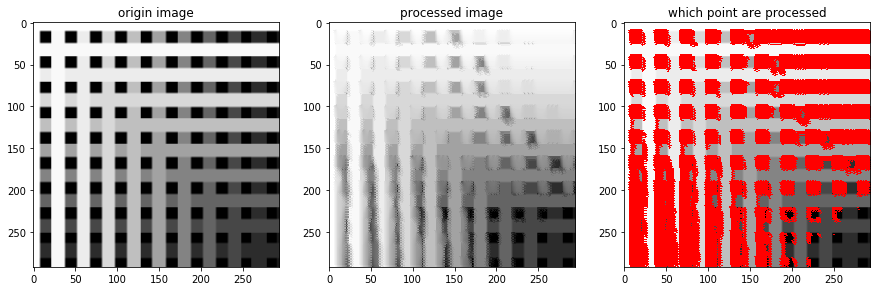

In [4]:

def smallWindow9Pixel(img,i,j):
    sumBrightness = 0;
    sumNumber = 0;
    for n in range(-1, 2):
        for m in range(-1, 2):
            # Prevent the index beyond borders
            if(0<=i+n<len(img) and 0<=j+m<len(img[i])):
                sumBrightness += img[i+n][j+m]
                sumNumber += 1;
    return int(sumBrightness/sumNumber)

def replaceDiffPoints(i,j):
    sumBrightness = 0
    sumNumber = 0
    average = 0
    # arrounding pixels which sorted by brightness
    sortedPoint = [];
    for n in range(-1, 2):
        for m in range(-1, 2):
            if(0<=i+n<len(testImg) and 0<=j+m<len(testImg[i])):
                sortedPoint.append([(i+n,j+m),testImg[i+n][j+m]])
            else:
                # do not replace the pixel's brightness is there isn't enough pixels surrounding
                return
    sortedPoint.sort()
    # calculate the average of the 5 pixels left.
    for m in sortedPoint[2:-2]:
        sumBrightness += m[1]
        sumNumber += 1

    if (sumNumber != 0):
        average = int(sumBrightness/sumNumber)
        
    # replace brightness with the average of the 5 pixels left
    for n in sortedPoint[0:2]:
        testImg[n[0][0]][n[0][1]] = average
        processedPoint.append([n[0][0],n[0][1]])
    for m in sortedPoint[-2:]:
        testImg[m[0][0]][m[0][1]] = average
        processedPoint.append([m[0][0],m[0][1]])

def processImage(img):
    for i in range(0, int(len(img))):
        for j in range(0,(len(img[i]))):
            average = smallWindow9Pixel(img,i,j)
            if(abs(img[i][j]-average) >10):
                replaceDiffPoints(i,j)

    # convert to BGR image for display which pixel are modified
    src_RGB = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    
    # set the color of pixel which is be modified to red
    for n in processedPoint:
        src_RGB[n[0]][n[1]] = [255,0,0]

    fig = plt.figure(figsize=(15,15))
    ax1 = fig.add_subplot(1,3,1)
    ax1.set_title('origin image',fontsize=12)
    ax1.imshow(origin, cmap='gray')
    
    ax2 = fig.add_subplot(1,3,2)
    ax2.set_title('processed image',fontsize=12)
    ax2.imshow(testImg, cmap='gray')
    
    ax3 = fig.add_subplot(1,3,3)
    ax3.set_title('which point are processed',fontsize=12)
    ax3.imshow(src_RGB)
    
    
# load the image
origin = cv2.imread("testPicture.png",cv2.IMREAD_GRAYSCALE)
testImg = cv2.imread("testPicture.png",cv2.IMREAD_GRAYSCALE)
# used for storing pixels which're value had been modified
processedPoint = []   
processImage(testImg)

## conclusion
name | pros | cons
---- | --- | ---
Q2-1 | It could quickly be calculated and compare to Q2-2, it's keeped details of image | inefficient to remove isolated noise
Q2-2 | It could used to smoothing the image | It's lost lot of details of image
